# Лабораторная работа № 1. Построение вариационных рядов. Расчет числовых характеристик.

# Ход работы

## 1. Построить ряды распределения

### 1.1 По данным выборки строим интервальный вариационный ряд.

а) Поскольку, как легко выяснить, $x_{\max} = 62{,}8$, $x_{\min} = 60{,}1$, то размах варьирования признака $X$ равен  
$$
R = x_{\max} - x_{\min} = 62{,}8 - 60{,}1 = 2{,}7.
$$

б) Определяя число $k$ интервалов (число столбцов в таблице) вариационного ряда, положим $k = 10$.

в) Длина $h$ каждого частичного интервала равна  
$$
h = \frac{R}{k} = \frac{2{,}7}{10} = 0{,}27.
$$  
Так как исходные данные мало отличаются друг от друга и содержат один десятичный знак, то величину $h$ округляем до одного десятичного знака:  
$$
h = 0{,}3.
$$

г) Подсчитываем число вариант, попадающих в каждый интервал, по данным выборки. Значение $x_i$, попадающее на границу интервала, относим к правому интервалу. За начало $x_0$ первого интервала берём величину  
$$
x_0 = x_{\min} - \frac{h}{2} = 60{,}1 - \frac{0{,}3}{2} = 60{,}1 - 0{,}15 = 59{,}95 \approx 60{,}0.
$$  
Конец последнего интервала $x_k$ находим по формуле  
$$
x_k = x_0 + k h = 59{,}95 + 10 \cdot 0{,}3 = 62{,}95 \approx 63{,}0.
$$

Сформированный интервальный вариационный ряд записываем в виде таблицы.

In [20]:
import math

# исходные данные
data = [
    61.2, 61.4, 60.2, 61.2, 61.3, 60.4, 61.4, 60.8, 61.2, 60.6,
    61.6, 60.2, 61.3, 60.3, 60.7, 60.9, 61.2, 60.5, 61.0, 61.4,
    61.1, 60.9, 61.5, 61.4, 60.6, 61.2, 60.1, 61.3, 61.1, 61.3,
    60.3, 61.3, 60.6, 61.7, 60.6, 61.2, 60.8, 61.3, 61.0, 61.2,
    60.5, 61.4, 60.7, 61.3, 60.9, 61.2, 61.1, 61.3, 60.9, 61.4,
    60.7, 61.2, 60.3, 61.1, 61.0, 61.5, 61.3, 61.9, 61.4, 61.3,
    61.6, 61.0, 61.7, 61.1, 60.9, 61.5, 61.6, 61.4, 61.5, 61.2,
    61.6, 61.3, 61.8, 61.1, 61.7, 60.9, 62.2, 61.1, 62.1, 61.0,
    61.5, 61.7, 62.3, 62.3, 61.7, 62.9, 62.5, 62.8, 62.6, 61.5,
    62.1, 62.6, 61.6, 62.5, 62.4, 62.3, 62.1, 62.3, 62.2, 62.1
]

x_min = min(data)
x_max = max(data)
R = round((x_max - x_min), 1)

k = 10

h = round((R/k), 1)
x_0 = round(x_min - 0.5*h)
x_k = x_max + 0.5*h

print(f" x min {x_min} \n x max {x_max} \n R {R} \n k {k} \n h {h}")
print("=======================================================")

# формирование вариантов интервалов
intervals = [(x_0 + i*h, x_0 + (i+1)*h) for i in range(k)]

# подсчитываем число вариант попадающих в каждый интервал
frequencies = []
sum_n_i = 0
for (start, end) in intervals:
    count = sum(1 for x in data if start <= x < end)
    sum_n_i += count
    frequencies.append(count)

list(zip(intervals, frequencies))
print("| Интервал | Частота |\n|----------|---------|")
for low, high in intervals:
    count = sum(1 for x in data if low <= x < high)
    print(f"| {low:.1f} – {high:.1f} | {count} |")
print(f"SUM n_i {sum_n_i}")


 x min 60.1 
 x max 62.9 
 R 2.8 
 k 10 
 h 0.3
| Интервал | Частота |
|----------|---------|
| 60.0 – 60.3 | 3 |
| 60.3 – 60.6 | 6 |
| 60.6 – 60.9 | 9 |
| 60.9 – 61.2 | 18 |
| 61.2 – 61.5 | 29 |
| 61.5 – 61.8 | 16 |
| 61.8 – 62.1 | 2 |
| 62.1 – 62.4 | 10 |
| 62.4 – 62.7 | 5 |
| 62.7 – 63.0 | 2 |
SUM n_i 100


Таблица 7
| Интервалы | 60.0 – 60.3 | 60.3 – 60.6 | 60.6 – 60.9 | 60.9 – 61.2 | 61.2 – 61.5 | 61.5 – 61.8 | 61.8 – 62.1 | 62.1 – 62.4 | 62.4 – 62.7 | 62.7 – 63.0 |
|-----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|
| Частота   | 3 | 6 | 9 | 18 | 29 | 16 | 2 | 10 | 5 | 2 |


Далее запишем дискретный вариационный ряд. В качестве варинат x <sub>i</sub> берем середины интервалов интервального вариационного ряда.

In [28]:
intervals
midpoints = [round(x[0] + 0.5 * h, 2) for x in intervals]
distrects

[60.15, 60.45, 60.75, 61.05, 61.35, 61.65, 61.95, 62.25, 62.55, 62.85]

Таблица 8
| Варианты $x_i$ | 60.15 | 60.45 | 60.75 | 61.05 | 61.35 | 61.65 | 61.95 | 62.25 | 62.55 | 62.85 |
|----------------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| Частота        |   3   |   6   |   9   |  18   |  29   |  16   |   2   |  10   |   5   |   2   |

Изображаем интервальный и дискретный вариационные ряды графически, построив гистограмму и полиго частот в одной системе координат (рис. 2).

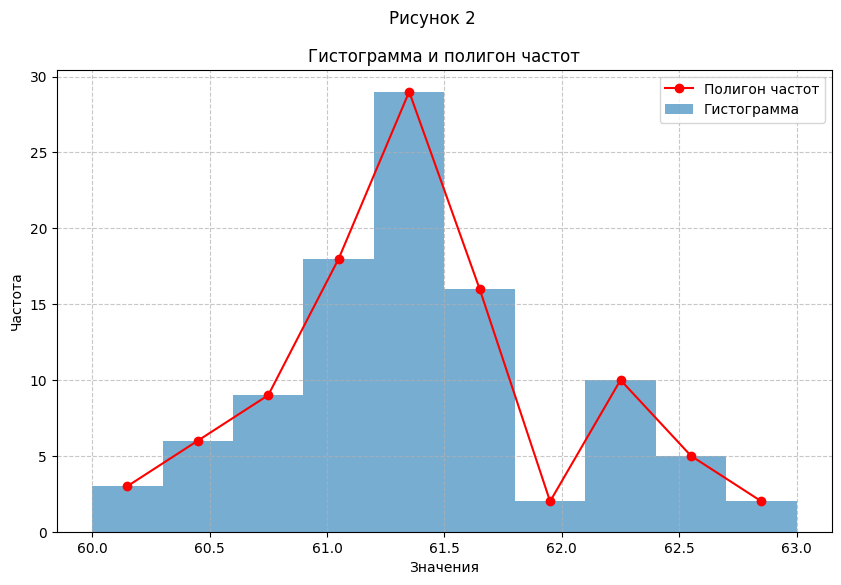

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Гистограмма
plt.figure(figsize=(10, 6))
plt.bar(midpoints, frequencies, width=0.3, alpha=0.6, label='Гистограмма', align='center')

# Полигон частот
plt.plot(midpoints, frequencies, marker='o', color='red', label='Полигон частот')

# Настройки
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма и полигон частот')
plt.suptitle("Рисунок 2")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

далее строим график накопленных частот, предварительно заполнив таблицу 9.

In [41]:
# относительные частоты
relative_frequencies = []

# накопительные относительные частоты
cumulative_relative_frequencies = []

# Вычисление относительных частот
for x in frequencies:
    w = x/sum_n_i
    relative_frequencies.append(w)

# Вычисление накомительных онтостительных частот
for x in range(len(relative_frequencies)):
    if x != 0:
        W = cumulative_relative_frequencies[x-1] + relative_frequencies[x]
        cumulative_relative_frequencies.append(W)
    elif x == 0:
        W = relative_frequencies[x]
        cumulative_relative_frequencies.append(W)

print(relative_frequencies)
print(cumulative_relative_frequencies)

[0.03, 0.06, 0.09, 0.18, 0.29, 0.16, 0.02, 0.1, 0.05, 0.02]
[0.03, 0.09, 0.18, 0.36, 0.6499999999999999, 0.8099999999999999, 0.83, 0.9299999999999999, 0.98, 1.0]


| Варианты, $x_i$ | 60,15 | 60,45 | 60,75 | 61,05 | 61,35 | 61,65 | 61,95 | 62,25 | 62,55 | 62,85 |
|------------------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| Относительные частоты, $w_i = n_i / n$ | 0,03  | 0,06  | 0,09  | 0,18  | 0,29  | 0,16  | 0,02  | 0,10  | 0,05  | 0,02  |
| Накопительные относительные частоты, $W_i = W_{i-1} + w_i$ | 0,03  | 0,09  | 0,18  | 0,36  | 0,65  | 0,81  | 0,83  | 0,93  | 0,98  | 1,00  |

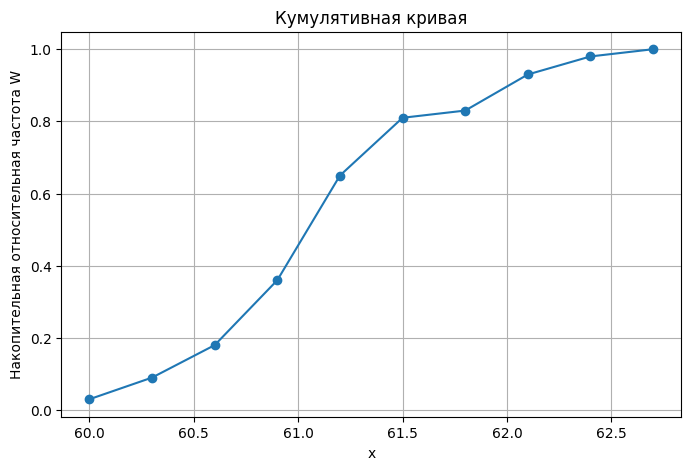

In [47]:
# Создание DataFrame
# Данные
x = [60.15, 60.45, 60.75, 61.05, 61.35, 61.65, 61.95, 62.25, 62.55, 62.85]
w = [0.03, 0.06, 0.09, 0.18, 0.29, 0.16, 0.02, 0.10, 0.05, 0.02]
df = pd.DataFrame({'x': [intr[0] for intr in intervals], 'w': w})
df['W'] = df['w'].cumsum()

# Построение кумулятивной кривой
plt.figure(figsize=(8, 5))
plt.plot(df['x'], df['W'], marker='o')
plt.xlabel('x')
plt.ylabel('Накопительная относительная частота W')
plt.title('Кумулятивная кривая')
plt.grid(True)
plt.show()